# Boston House Rent Predictor Adaboost Model

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
data=pd.read_csv(r'C:\Users\joshi\Downloads\boston_house_rent.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Features Discription :
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non retail business acres per town
* CHAS - charles river dummy variable (=1 if track bounds river, 0 otherwise)
* NOX - nitric oxide concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distance to 5 Boston employment centre
* RAD - index of accessibilty to radial highways
* TAX - full value property-tax rate per 10,000 USD
* PTRatio - pupil-teacher ratio by town
* B - 1000(Bk-0.63)^2 where Bk is proportion of blacks by town
* LStat - % lower status of the population

In [3]:
#checking nulls
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [4]:
#data discription
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#correlation between the features
corr=data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


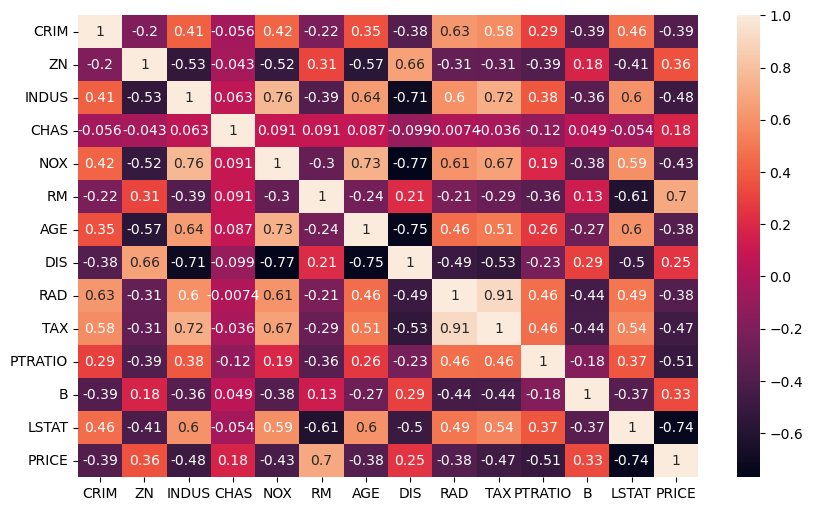

In [6]:
#plotting heatmap of correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

Seems RAD and TAX are correlated. Let's check with scatter plot.

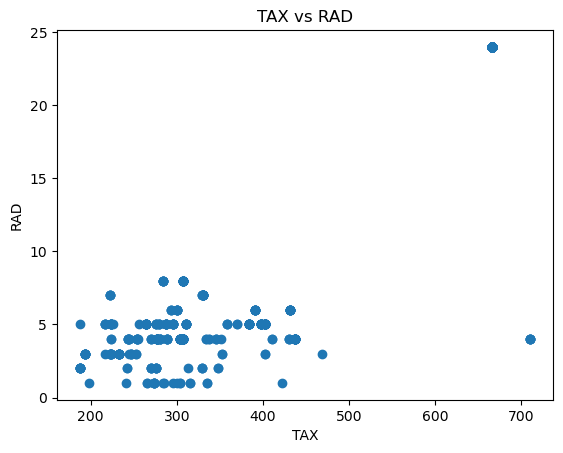

In [7]:
plt.scatter(data.TAX, data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

Since we cannot conclude it with the plot that if there is a close relation. We cannot take the risk of deleting any feature.

In [8]:
#dividing feature and label
x=data.drop(columns=['PRICE'], axis=1)
y=data['PRICE']

In [9]:
#train test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=100)

Adaboost model training

In [10]:
ada=AdaBoostRegressor()

In [11]:
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [12]:
#model prediction
y_pred=ada.predict(x_train)

In [13]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70
46,0.18836,0.0,6.91,0,0.4480,5.786,33.3,5.1004,3,233,17.9,396.90,14.15
50,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45
308,0.49298,0.0,9.90,0,0.5440,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [14]:
y_pred[:6]

array([18.24712644, 21.37931034, 21.37931034, 25.31270718, 20.72967033,
       25.41404959])

In [16]:
accuracy=metrics.r2_score(y_train, y_pred)
accuracy

0.9066732750386953

Since model has already seen the data, it is producing better accuracy.

In [17]:
#predicting test data with the model
y_test_pred=ada.predict(x_test)

In [18]:
#model evaluation
accuracy=metrics.r2_score(y_test, y_test_pred)
accuracy

0.7911504415386429

Hyperparameter tuning using randomizedSearchCV.

In [19]:
params={'n_estimators':[47,50,60,70], 'learning_rate':[0.09, 0.25, 0.30]}

In [20]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [21]:
#fitting
rnd_srch.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [22]:
#getting the best estimators
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [23]:
#accuracy after tuning
ada=AdaBoostRegressor(learning_rate=0.25, n_estimators=70)
ada.fit(x_train, y_train)
y_pred=ada.predict(x_test)
metrics.r2_score(y_test, y_pred)

0.815268422761548

and we are done here!